# Entrando com as informações de acesso ao servidor

In [ ]:
# -*- coding: utf-8 -*-

# Entrando com os pacotes necessários 

import pandas as pd # manipula os dados em DataFrame
import psycopg2 # conecta o banco sql ao python
import pandas.io.sql as sqlio # importa os dados do banco sql em formato Dataframe

# Colocando as informações de login no servidor

host = 'db.candidates.sandbox.data.quintoandar.com.br'
dbname= 'quintoandar' 
username = 'data-analytics' 
password = 'ExTDDzjzPE7BJ27D' 

# Realizando a coneção com o banco de dados

conn = psycopg2.connect(host = host, dbname = dbname, user = username, password = password, port='5432')

# Importando as bases de dados 

In [3]:
# Puxando o banco de dados (SIAPE)

sql = f"select * from quintoandar.public.tenant_reviews_clean trc;"
df_review = sqlio.read_sql_query(sql, conn) # Pegando as tabelas de interesse 

sql = f"select * from quintoandar.public.visits_contracts vc;"
df_visits = sqlio.read_sql_query(sql, conn) # Pegando as tabelas de interesse 

sql = f"select * from quintoandar.public.visits_offers_contracts voc ;"
df_offer = sqlio.read_sql_query(sql, conn) # Pegando as tabelas de interesse 

### Conferindo a redução no número de contratos

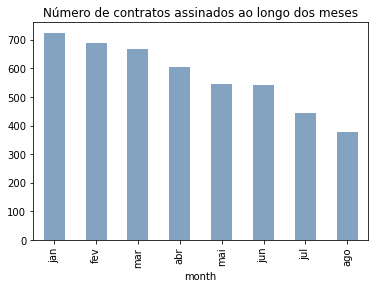

In [22]:
df = df_offer[['month', 'contracts']]
df.set_index('month', inplace=True)

df['contracts'].head(15).plot.bar([1,2,3,4,5,6,7,8],color=(0.2, 0.4, 0.6, 0.6),title='Número de contratos assinados ao longo dos meses');

### Número médio de visitas por pessoa

In [13]:
# Número médio de visitas realizadas por mês

visitas_media = df_offer['visits']/df_offer['tenant_that_visited']

# Criando uma visualização em DataFrame

df = pd.DataFrame (visitas_media ,columns=['Visitas média'])
df['Mês'] = range(1,9)
df['Visitas'] = df_offer['visits']
df['Inquilinos que visitaram'] = df_offer['tenant_that_visited']
df.set_index('Mês', inplace=True)

round(df,2)

,Visitas média,Visitas,Inquilinos que visitaram
Mês,,,
1,1.52,7130,4678
2,1.37,7132,5193
3,1.30,6933,5322
4,1.26,7342,5844
5,1.18,7238,6112
6,1.25,8377,6710
7,1.14,8130,7122
8,1.09,8288,7630


<ipython-input-14-e9b5d4625b9a>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


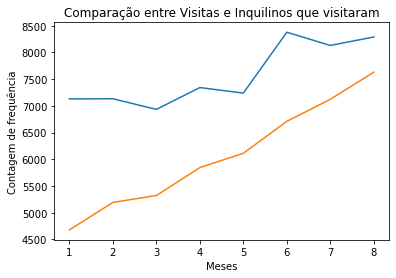

In [14]:
# Gráfico número 1

import matplotlib.pyplot as plt

plt.plot(range(1,9),df['Visitas']);

ax = plt.axes()
ax.plot(range(1,9),df['Inquilinos que visitaram'])
ax.set(xlabel='Meses', ylabel='Contagem de frequência',
       title='Comparação entre Visitas e Inquilinos que visitaram');

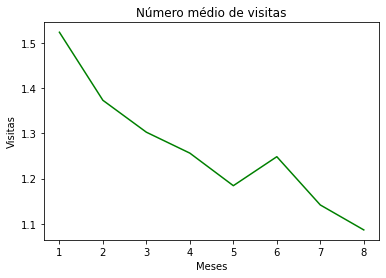

In [5]:
# Gráfico número 2

ax = plt.axes()
ax.plot(range(1,9),df['Visitas média'], 'green')
ax.set(xlabel='Meses', ylabel='Visitas',
       title='Número médio de visitas');

### Número médio de visitas para assinatura

In [15]:
# Calculando o o número médio de assinaturas após X visitas

media = round(100*(df_visits['tenants_that_signed']/(df_visits['tenants_that_did_not_sign'] + df_visits['tenants_that_signed'])),2)

# Criando uma visualização em DataFrame

df = pd.DataFrame (media ,columns=['Média de assinatura'])
df['Visitas'] = range(1,16)
df.set_index('Visitas', inplace=True)

df

,Média de assinatura
Visitas,
1,2.82
2,5.34
3,8.41
4,11.15
5,17.50
6,14.29
7,10.92
8,8.47
9,5.41


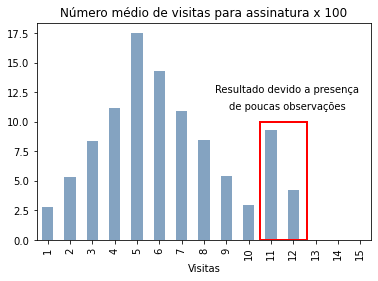

In [17]:
# Visualização Gráfica

import matplotlib.patches as mpatches

rect=mpatches.Rectangle((9.5,0),2.1,10, 
                        fill = False,
                        color = "red",
                        linewidth = 2)

df['Média de assinatura'].head(15).plot.bar(color=(0.2, 0.4, 0.6, 0.6),title='Número médio de visitas para assinatura x 100').add_patch(rect);
plt.text(7.5, 12.5, "Resultado devido a presença ")
plt.text(8.1, 11, "de poucas observações");

### Visualizando o número médio de ofertas que viraram contratos

In [8]:
# Calculando o número médio de ofertas que viraram contratos

media_contrato = (df_offer['contracts']/df_offer['offers'])*100

# Criando uma visualização em DataFrame

df = pd.DataFrame (media_contrato ,columns=['Média de contratos'])
df['Mês'] = range(1,9)
df.set_index('Mês', inplace=True)

round(df,2)

,Média de contratos
Mês,
1,18.45
2,18.84
3,17.59
4,24.58
5,15.17
6,18.00
7,12.66
8,10.96


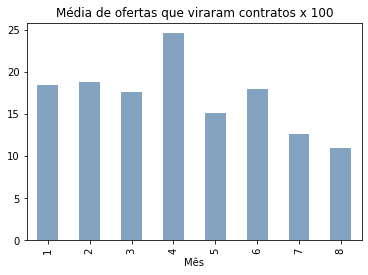

In [9]:
# Gráfico número 1

df['Média de contratos'].head(15).plot.bar(color=(0.2, 0.4, 0.6, 0.6),title='Média de ofertas que viraram contratos x 100');

### Conferindo se ocorreu uma mudança dos reviews ao longo dos meses

In [10]:
import statistics

# Separando o ano e mês das visitas

df_review['Mes'] = df_review['visit_date'].astype(str).str[5:7]
df_review = df_review[df_review['Mes'] != '12']

# Realizando o agrupamento dos dados

reviews_nota = (df_review[df_review.review.isin(['1','2','3','4','5'])]).reset_index()
del reviews_nota['index']

reviews_nota['review'] = reviews_nota['review'].astype(int)

agrupamento = reviews_nota.groupby(reviews_nota['Mes'])['review'].agg(['mean'])

agrupamento.rename(columns={'mean': 'Review Médio por mês'}, inplace=True)

media_review = statistics.mean(reviews_nota['review'])

round(agrupamento,2)

,Review Médio por mês
Mes,
01,4.13
02,4.11
03,4.16
04,4.10
05,4.20
06,4.23
07,4.22
08,4.26


(3.0, 5.0)

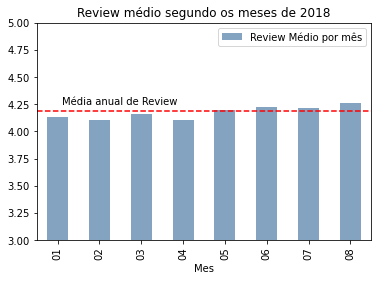

In [11]:
# Realizando o gráfico

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

agrupamento.head(15).plot.bar(color=(0.2, 0.4, 0.6, 0.6),title='Review médio segundo os meses de 2018');
plt.axhline(y=media_review, color='r', linestyle='--')
plt.text(0.1, 4.25, "Média anual de Review")
plt.ylim([3, 5])

### Conferindo se existiu uma mudança na contagem de algumas categorias

In [12]:
# Índice de reclamações ao longo dos meses 

building = df_review[df_review['building']==True].groupby(df_review['Mes'])['building'].agg(['count'])
building.rename(columns={'count': 'Construção'}, inplace=True)

conservation = df_review[df_review['conservation']==True].groupby(df_review['Mes'])['conservation'].agg(['count'])
conservation.rename(columns={'count': 'Conservação'}, inplace=True)

size = df_review[df_review['size']==True].groupby(df_review['Mes'])['size'].agg(['count'])
size.rename(columns={'count': 'Tamanho'}, inplace=True)

price = df_review[df_review['price']==True].groupby(df_review['Mes'])['price'].agg(['count'])
price.rename(columns={'count': 'Preço'}, inplace=True)

location = df_review[df_review['location']==True].groupby(df_review['Mes'])['location'].agg(['count'])
location.rename(columns={'count': 'Localização'}, inplace=True)

did_not_like_the_location = df_review[df_review['did_not_like_the_location']==True].groupby(df_review['Mes'])['did_not_like_the_location'].agg(['count'])
did_not_like_the_location.rename(columns={'count': 'Não gostou da localização'}, inplace=True)

expected_a_better_preserved_property = df_review[df_review['expected_a_better_preserved_property']==True].groupby(df_review['Mes'])['expected_a_better_preserved_property'].agg(['count'])
expected_a_better_preserved_property.rename(columns={'count': 'Esperava uma propriedade mais preservada'}, inplace=True)

bigger_in_photos = df_review[df_review['bigger_in_photos']==True].groupby(df_review['Mes'])['bigger_in_photos'].agg(['count'])
bigger_in_photos.rename(columns={'count': 'Maior na foto'}, inplace=True)

different_from_the_listing = df_review[df_review['different_from_the_listing']==True].groupby(df_review['Mes'])['different_from_the_listing'].agg(['count'])
different_from_the_listing.rename(columns={'count': 'Diferente da listagem'}, inplace=True)

tabela = pd.concat([building, conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing],axis=1)

tabela

,Construção,Conservação,Tamanho,Preço,Localização,Não gostou da localização,Esperava uma propriedade mais preservada,Maior na foto,Diferente da listagem
Mes,,,,,,,,,
01,253,300,303,225,393,56,220,140,42
02,275,335,336,224,418,82,207,143,34
03,346,449,468,307,584,92,241,178,42
04,286,356,365,244,467,78,239,181,28
05,254,339,334,227,393,66,172,136,28
06,381,487,473,316,621,91,276,181,33
07,431,553,542,382,690,104,321,212,47
08,613,796,769,563,958,141,401,286,54


### Criando uma núvem de palavras com o campo texto

In [20]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import nltk

# Entrando com stopwords em portugues

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

# Pegando a lista de comentarios

lista = df_review.dropna().others.tolist() 

texto = str(lista).lower()

# Realizando a leitura da imagem que vai dar forma a nuvem

mask = np.array(Image.open("f0ed061fa27b96aa021ebca19f3e2e14.jpg"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


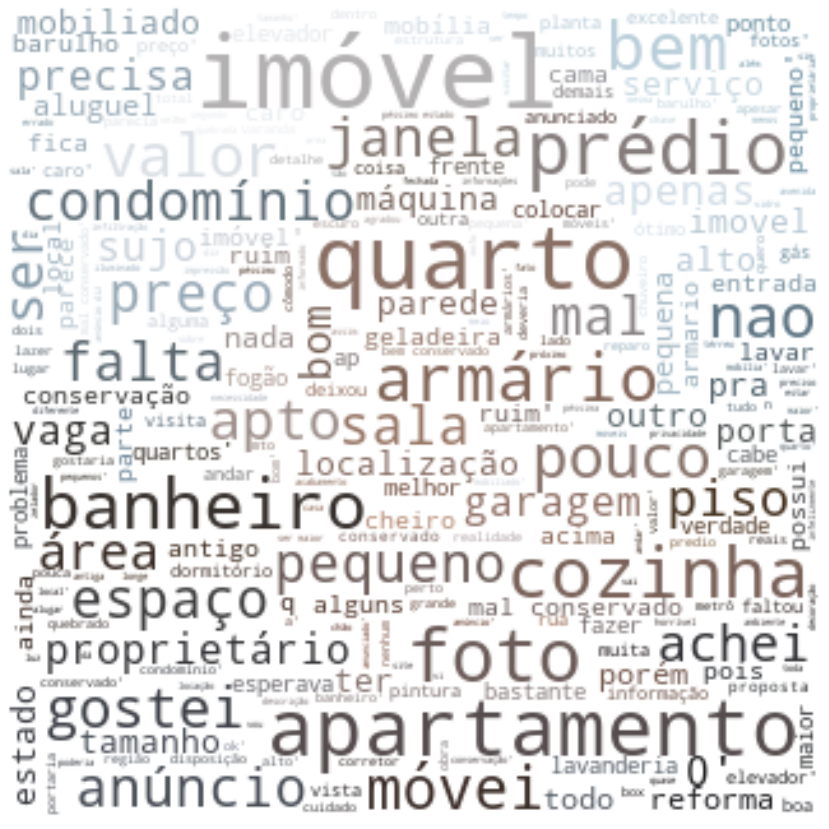

In [21]:
wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(texto)

# create coloring from image
image_colors = ImageColorGenerator(mask)

# show
fig, axes = plt.subplots(1,1,figsize=(15,15))

# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes.set_axis_off()
plt.show()